In [1]:
# Step 1: Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Step 2: Load Data

url = "https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv"
df = pd.read_csv(url)  
print(df.head())

   Unnamed: 0   Loan_ID  Gender Married Dependents     Education  \
0           0  LP002305  Female      No          0      Graduate   
1           1  LP001715    Male     Yes         3+  Not Graduate   
2           2  LP002086  Female     Yes          0      Graduate   
3           3  LP001136    Male     Yes          0  Not Graduate   
4           4  LP002529    Male     Yes          2      Graduate   

  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0            No             4547                0.0       115.0   
1           Yes             5703                0.0       130.0   
2            No             4333             2451.0       110.0   
3           Yes             4695                0.0        96.0   
4            No             6700             1750.0       230.0   

   Loan_Amount_Term  Credit_History Property_Area  Loan_Status  
0             360.0             1.0     Semiurban            1  
1             360.0             1.0         Rural         

In [3]:
#Step 3: Preprocess the Data
df.drop(columns=['Loan_ID'], inplace=True)  # not useful for prediction

# Fill missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)  #For text columns → use most common value (mode)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)  #For number columns → use median value
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

C:\Users\Ashvini Davale\AppData\Local\Temp\ipykernel_21308\4043692215.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)  #For text columns → use most common value (mode)
C:\Users\Ashvini Davale\AppData\Local\Temp\ipykernel_21308\4043692215.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermed

In [5]:
# Step 4: Convert Categorical Text to Numbers
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']
le = LabelEncoder()  #ML models like decision trees can’t read text — they need numbers.
#So we convert "Male"/"Female", "Yes"/"No", etc., into numbers like 0 and 1 using LabelEncoder.
for col in cols:
    df[col] = le.fit_transform(df[col])

In [6]:
# Step 5: Define X and y
X = df.drop('Loan_Status', axis=1)  #all columns except loan_status
y = df['Loan_Status']

In [9]:
# Step 6: Split Data (Train/Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Step 7: Train the Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)  #If income is high and credit is good → approve loan

DecisionTreeClassifier(random_state=42)

In [11]:
y_pred = model.predict(X_test)

Accuracy: 0.7070707070707071

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.47      0.52        34
           1       0.75      0.83      0.79        65

    accuracy                           0.71        99
   macro avg       0.67      0.65      0.66        99
weighted avg       0.70      0.71      0.70        99



<Axes: >

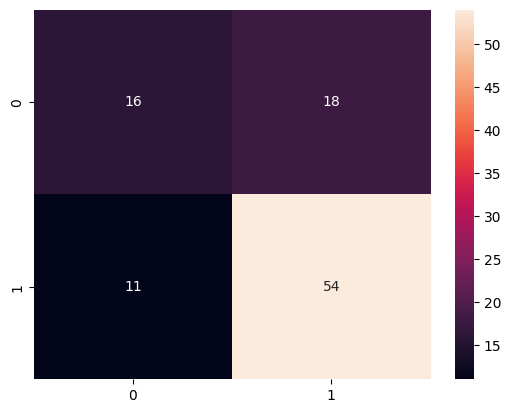

In [12]:
#  Step 8: Check Accuracy and Confusion Matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
